K-Means
==

C:\Users\herna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\herna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.7302382722834697


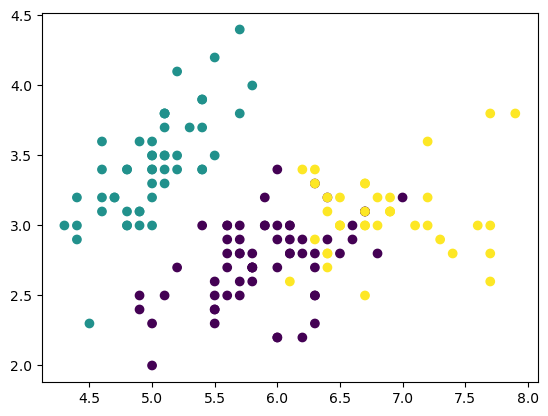

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()
datos = iris.data
etiquetas = iris.target
#n_clusters es la cantidad de grupos que queremos
#con max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
k_means = KMeans(n_clusters=3, max_iter=2000) # se da el numero de cluster pero se puede saber cuantos hay
k_means.fit(datos) #no tenemos las etiquetas
#predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(datos)
#print(predicciones)
#podemos comparar los resultados predichos con las etiquetas que ya teniamos
#para ver cuan bien aprendio.
score=metrics.adjusted_rand_score(etiquetas, predicciones)
#El resultado es un 73% lo cual no es muy bueno
print(score)
plt.scatter(datos[:, 0], datos[:, 1], c=predicciones)

plt.show()

 

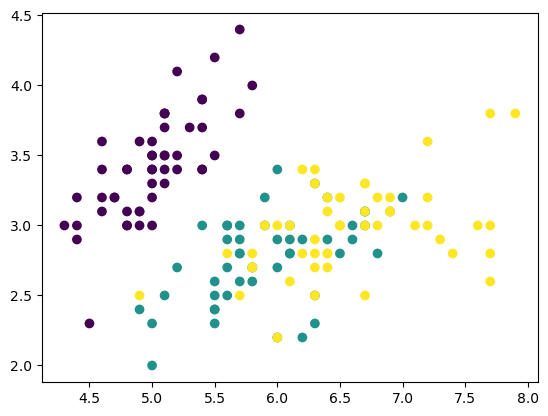

In [8]:
plt.scatter(datos[:, 0], datos[:, 1], c=etiquetas) #los puntos morados estan bien clasificados

plt.show()

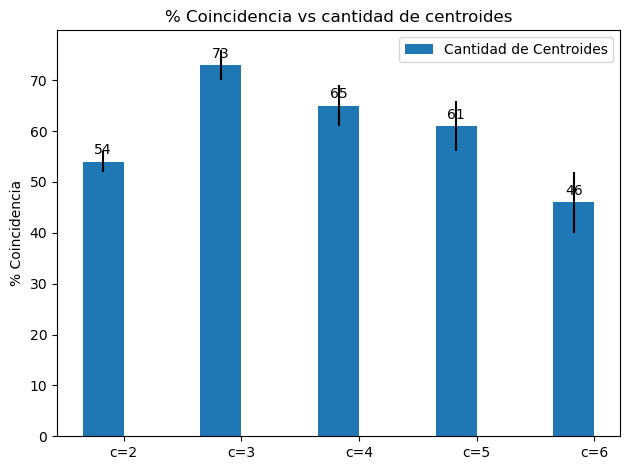

In [3]:
# histograma grafica el % de coincidencia en funcion de los centroides elegicos
# al no conocer los centroides buscando las coincidencias se puede elegir la mejor opcion


centroides_means, centroides_std = (54, 73, 65, 61, 46), (2, 3, 4, 5, 6)

ind = np.arange(len(centroides_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, centroides_means, width, yerr=centroides_std, label='Cantidad de Centroides')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Coincidencia')
ax.set_title('% Coincidencia vs cantidad de centroides')
ax.set_xticks(ind)
ax.set_xticklabels(('c=2', 'c=3', 'c=4', 'c=5', 'c=6'))
ax.legend()


def autolabel(rects, xpos='center'):
    ha = {'center': 'center'}
    offset = {'center': 0}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "center")

fig.tight_layout()

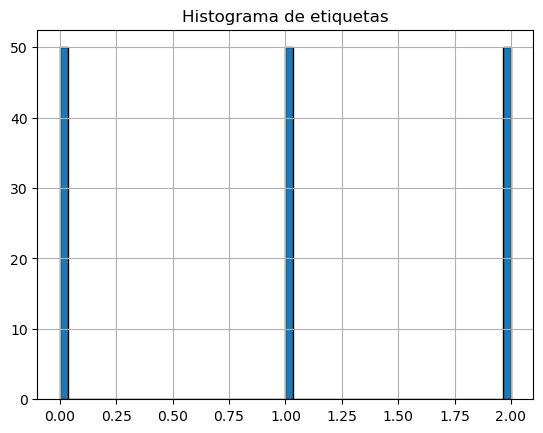

<Figure size 640x480 with 0 Axes>

In [4]:
# histogramas de etiquetas
# analisis posterior al entrenamiento que es altamente recomendable de hacer

plt.title('Histograma de etiquetas')
plt.hist(etiquetas, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

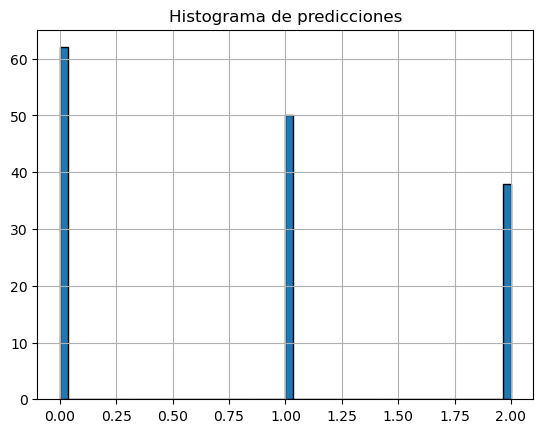

<Figure size 640x480 with 0 Axes>

In [5]:
###################################################################
plt.title('Histograma de predicciones')
plt.hist(predicciones, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

MiniBatch
==

C:\Users\herna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\herna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0.7163421126838476


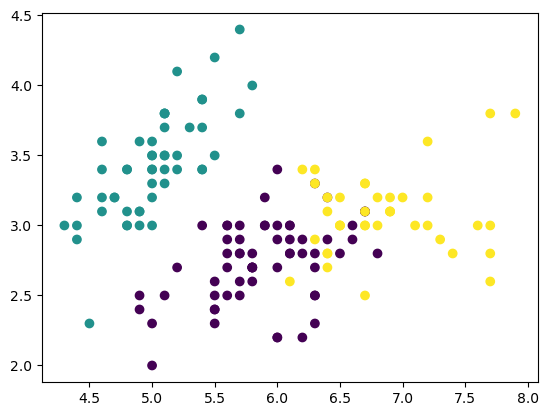

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()
datos = iris.data
etiquetas = iris.target
#n_clusters es la cantidad de grupos que queremos
#con max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
k_means = MiniBatchKMeans(n_clusters=3, max_iter=2000) 
k_means.fit(datos)
#predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(datos)
#print(predicciones)
#podemos comparar los resultados predichos con las etiquetas que ya teniamos
#para ver cuan bien aprendio.
score=metrics.adjusted_rand_score(etiquetas, predicciones)
#El resultado es un 73% lo cual no es muy bueno
print(score)
plt.scatter(datos[:, 0], datos[:, 1], c=predicciones)

plt.show()

AffinityPropagation
==

Estimated number of clusters: 3
0.8022085453675192


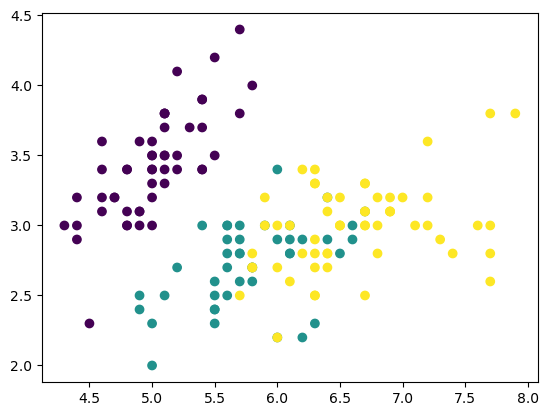

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()
datos = iris.data
etiquetas = iris.target
 
afinidad_por_propagacion = AffinityPropagation(preference=-50, damping=0.5, random_state=None) 

af = afinidad_por_propagacion.fit(datos)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

af.fit(datos)
predicciones=af.predict(datos)
score=metrics.adjusted_rand_score(etiquetas, predicciones)
print(score)
plt.scatter(datos[:, 0], datos[:, 1], c=predicciones)

plt.show()


